<a href="https://colab.research.google.com/github/mhknb/Data_Statistic/blob/main/Ch1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Drive Import Operations

In [ ]:
from google.colab import drive
drive.mount('/gdrive/')

Drive already mounted at /gdrive/; to attempt to forcibly remount, call drive.mount("/gdrive/", force_remount=True).


In [ ]:
import os 
os.chdir('/gdrive/MyDrive/Data_Sci/Data/titanic/')

In [ ]:
!ls


gender_submission.csv  test.csv  train.csv


### Data Operations

In [ ]:
# We use pandas library to import data
import pandas as pd

In [ ]:
#import data into a dataframe using pandas
t_train = pd.read_csv('./train.csv') 
t_test = pd.read_csv('./test.csv')

In [ ]:
t_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Explore Continous Data

In [ ]:
df_num = t_train[['Age','SibSp','Parch','Fare']]
df_cat = t_train[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

In [ ]:
import numpy as np

In [ ]:
#We use numpy statistic methods here
#https://numpy.org/devdocs/reference/routines.statistics.html 


print("Mean", np.mean(df_num['Age']))  
#Median with NaNs
print("Median", np.median(df_num['Age']))
#Median without Nans
print("Median", np.nanmedian(df_num['Age']))

Mean 29.69911764705882
Median nan
Median 28.0


In [ ]:
print("Standard Deviation",np.std(df_num['Age']))
print("Variance",np.var(df_num['Age']))
print("Covariance",np.cov(df_num['Age'],df_num['Age']*2))

Standard Deviation 14.516321150817316
Variance 210.72357975366614
Range [[nan nan]
 [nan nan]]


In [ ]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9]
y = [1, 2, 3, 1, 2, 3, 1, 2, 3]
np.cov(x, y)

array([[7.5 , 0.75],
       [0.75, 0.75]])

In [ ]:
# Mean Absolute Deviation with Numpy
print(np.mean(np.absolute(df_num['Age'] - np.mean(df_num['Age']))))

# Mean Absolute Deviation with Pandas
print(df_num['Age'].mad())

11.322944471906409
11.322944471906409


###Practice
Write code for this:
Median Absolute Deviation 


In [ ]:
#Percentile
print("25 : ", np.nanpercentile(df_num['Age'],25))
print("50 : ", np.nanpercentile(df_num['Age'],50))
print("75 : ", np.nanpercentile(df_num['Age'],75))

25 :  20.125
50 :  28.0
75 :  38.0


In [ ]:
t_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Visualize Continous Data

Seaborn

https://seaborn.pydata.org/index.html

In [ ]:
#We use seaborn library for visualization
import seaborn as sns

In [ ]:
#We Can import titanic data using Seaborn
df = sns.load_dataset("titanic")

### Box Plot

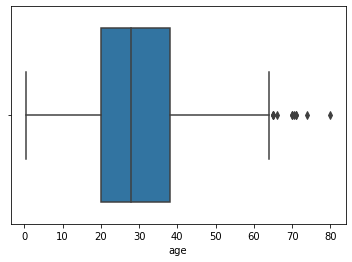

In [ ]:
sns.boxplot(x=df["age"])

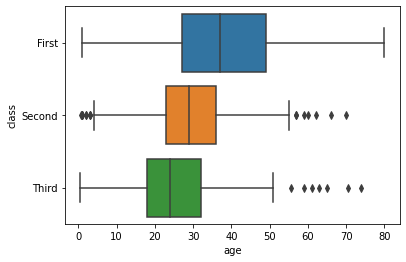

In [ ]:
sns.boxplot(data=df, x="age", y="class")

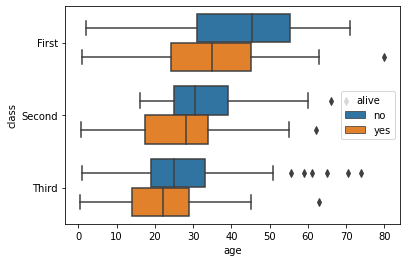

In [ ]:
sns.boxplot(data=df, x="age", y="class", hue="alive")

### Histogram ( A plot of the frequency table with bins)

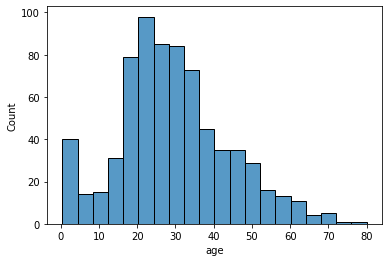

In [ ]:
sns.histplot(data=df, x="age")

Density Plot (Kernel Density Estimate)

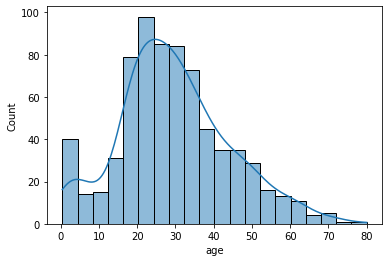

In [ ]:
sns.histplot(data=df, x="age", kde=True)

## Explore Categorical Data
barplot

https://seaborn.pydata.org/generated/seaborn.barplot.html

countplot

https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot



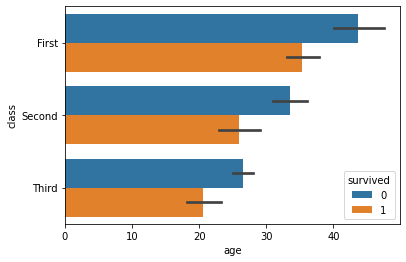

In [ ]:
sns.barplot(data=df, x="age", y="class", hue = "survived")

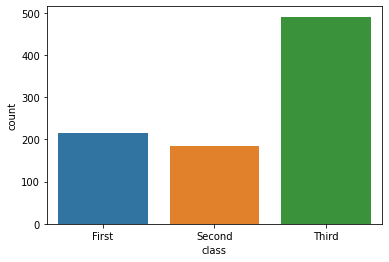

In [ ]:
sns.countplot(data=df, x="class")

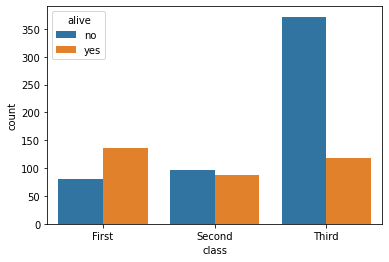

In [ ]:
#Let's checkout the surviving rate according to class number
sns.countplot(data=df, x="class", hue= "alive")

**Pie Chart** is available in another library named matplotlib

In [ ]:
print(df["class"].value_counts())

Third     491
First     216
Second    184
Name: class, dtype: int64


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
my_labels = [x for x in df.pclass.value_counts().index]
values = df.pclass.value_counts()

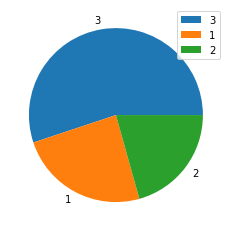

In [ ]:
plt.pie(values, labels = my_labels)
plt.legend()
plt.show() 

**Correlation**

correlation between two features with the Pandas  

`feature1.corr(feature2)`

In [ ]:
df['survived'].corr(df['age'])

-0.07722109457217768

Correlation matrix can be visualized using Heatmaps

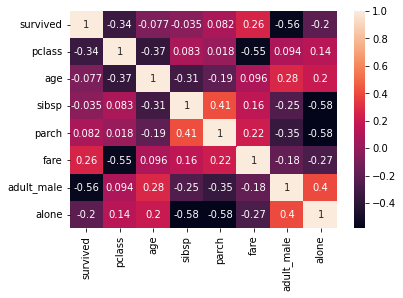

In [ ]:
sns.heatmap(df.corr(), annot=True)
plt.show()

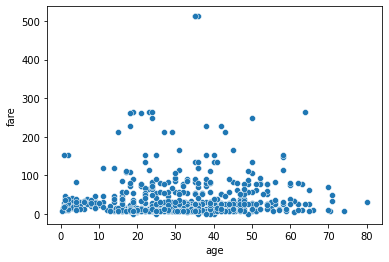

In [ ]:
sns.scatterplot(data= df, x= df["age"], y= df["fare"])

**Central Limit Theorem**

Example

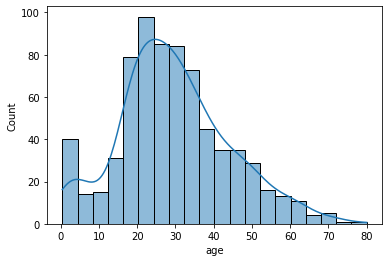

In [ ]:
sns.histplot(df["age"],kde="True")

In [ ]:
print(df["age"].mean())

29.69911764705882


In [ ]:
import numpy as np

The **Central Limit Theorem** is a statistical concept that states that as the sample size increases, the distribution of sample means will approach a normal distribution. This is useful for making estimates about a population based on a small sample size, as demonstrated by an example of estimating the average height of people in a city.

In [ ]:
means_lst = []
for i in range(1,100):
  means_lst.append( np.nanmean(np.random.choice(df["age"],100))  )

In [ ]:
np.mean(means_lst)

29.664632385176805

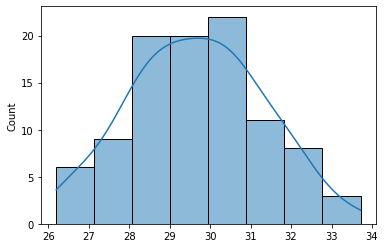

In [ ]:
sns.histplot(means_lst,kde=True)